In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#读取数据
path = '/home/wuchao/lianxidata/input'
train = pd.read_csv(path + '/train.csv',index_col=0)
test = pd.read_csv(path + '/test.csv',index_col=0)
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#查看训练和测试数据大小
train.shape

(1460, 80)

In [4]:
test.shape

(1459, 79)

In [5]:
#显示特征
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

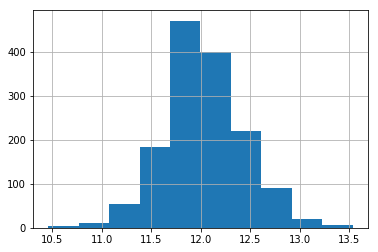

In [6]:
#label本身并不平滑。为了我们分类器的学习更加准确，我们会首先把label给“平滑化”（正态化）
#也就是log(y+1),后面预测的时候要还原也就是exp
y_train = np.log1p(train.pop('SalePrice'))
y_train.hist()

In [7]:
#合并数据(后面记得分开)
all_df = pd.concat((train, test), axis=0)
all_df.shape

(2919, 79)

In [9]:
#*MSSubClass* 的值其实应该是一个category，
#但是Pandas是不会懂这些事儿的。使用DF的时候，这类数字符号会被默认记成数字。
#这种东西就很有误导性，我们需要把它变回成*string*
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
all_df['MSSubClass'].value_counts().sort_values()

150       1
40        6
180      17
45       18
75       23
85       48
190      61
90      109
80      118
70      128
160     128
30      139
120     182
50      287
60      575
20     1079
Name: MSSubClass, dtype: int64

### 当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。
### pandas自带的get_dummies方法，可以帮你一键做到One-Hot。

In [10]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head(5)

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 我们把所有的category数据，都给One-Hot了

In [11]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


### 处理缺失值,用均值代替

In [12]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [13]:
means = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(means)
all_dummy_df.isnull().sum().sum()

0

#### 标准化numerical数据

这一步并不是必要，但是得看你想要用的分类器是什么。一般来说，regression的分类器都比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。

这里，我们当然不需要把One-Hot的那些0/1数据给标准化。我们的目标应该是那些本来就是numerical的数据：

先来看看 哪些是numerical的：

In [14]:
cols = all_df.columns[all_df.dtypes != 'object']
cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
cols_mean = all_dummy_df.loc[:,cols].mean()
#cols_mean
cols_std = all_dummy_df.loc[:,cols].std()
#cols_std

In [16]:
all_dummy_df.loc[:,cols] = (all_dummy_df.loc[:,cols] - cols_mean) / cols_std

### 把数据分回去

In [17]:
train_dummy = all_dummy_df.loc[train.index]
test_dummy = all_dummy_df.loc[test.index]

In [18]:
train_dummy.shape 
test_dummy.shape

(1459, 303)

In [19]:
X_train = train_dummy.values
X_test = test_dummy.values

## 建立模型

### Bridge分类器做交叉验证,找到最好的参数

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [21]:
alphas = np.logspace(-3,2,50)
test_score = []
for alpha in alphas:
    clf = Ridge(alpha)
    score = np.sqrt(-cross_val_score(clf, X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_score.append(np.mean(score))

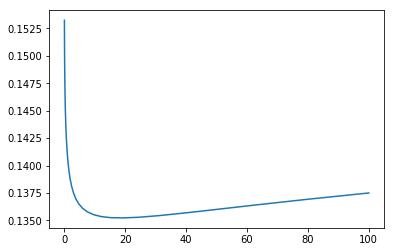

In [22]:
plt.plot(alphas, test_score)

##### 可以看到Bridge在参数为15时候误差最小,差不多为0.135

### RF找到最好的参数

In [23]:
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

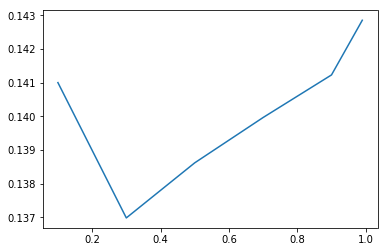

In [24]:
plt.plot(max_features, test_scores)

#### RF在参数为0.3的时候误差最小,差不多为0.137

### bagging(这里选择参数为15的Bridge,发现误差在0.132的样子)

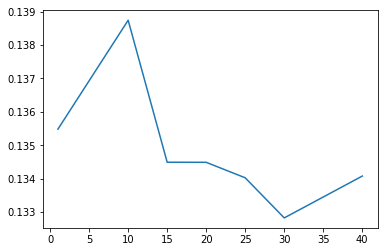

In [26]:
from sklearn.ensemble import BaggingRegressor
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=Ridge(alpha=15))
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)

### Boosting(误差有0.15左右)

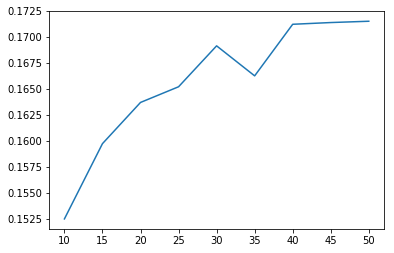

In [27]:
from sklearn.ensemble import AdaBoostRegressor
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=Ridge(alpha=15))
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)

### xgboost(发现当max_depth=5的时候误差达到了最小的0.127的样子)

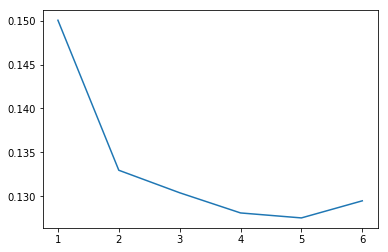

In [28]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)

### 经过上面的调参和模型对比,最后选择max_depth=5的xgboost作为最后的模型进行预测.

In [29]:
xgb = XGBRegressor(max_depth=5)
xgb.fit(X_train, y_train)
y_final = np.expm1(xgb.predict(X_test))

### 保存结果

In [32]:
submission_df = pd.DataFrame(data = {'Id':test.index, 'SalePrice':y_final})
submission_df.to_csv('submission.csv',index=False)
submission_df.head(20)

,Id,SalePrice
0,1461,122858.617188
1,1462,162398.265625
2,1463,189725.781250
3,1464,189369.843750
4,1465,189783.156250
5,1466,175549.281250
6,1467,175227.453125
7,1468,163846.906250
8,1469,185315.562500
9,1470,122427.609375
